# LIDAR - ONLY PROCESSING

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
pwd

'/content'

In [4]:
os.chdir('gdrive/My Drive/COURSES/ROBOTICS LABORATORY/SPAD WORKSHOP')

In [5]:
pwd

'/content/gdrive/My Drive/COURSES/ROBOTICS LABORATORY/SPAD WORKSHOP'

In [7]:
!git clone https://github.com/senth-srmist/test_repo

fatal: destination path 'test_repo' already exists and is not an empty directory.


In [8]:
data = np.fromfile('test_repo/velodyne_points/data/0000000000.bin',dtype=np.float32) # Point Cloud Data

In [ ]:
data.shape

(493588,)

In [ ]:
print(data[0]) #X
print(data[1]) #Y
print(data[2]) #Z
print(data[3]) #Reflectance

22.719
0.031
0.977
0.32


In [ ]:
print(data[4]) #X
print(data[5]) #Y
print(data[6]) #Z
print(data[7]) #Reflectance

18.052
0.076
0.82
0.46


In [9]:
data_mod = data.reshape(-1, 4)

In [ ]:
data_mod.shape

(123397, 4)

In [ ]:
print(data_mod[:10,:])

[[22.719  0.031  0.977  0.32 ]
 [18.052  0.076  0.82   0.46 ]
 [18.026  0.132  0.819  0.24 ]
 [23.032  0.249  0.988  0.3  ]
 [23.139  0.323  0.992  0.35 ]
 [23.258  0.361  0.996  0.27 ]
 [23.517  0.439  1.004  0.22 ]
 [23.579  0.515  1.007  0.43 ]
 [23.635  0.59   1.009  0.42 ]
 [23.699  0.666  1.011  0.4  ]]


In [ ]:
np.max(data)

77.739

In [ ]:
np.min(np.abs(data))

0.0

In [ ]:
np.min(data)

-79.833

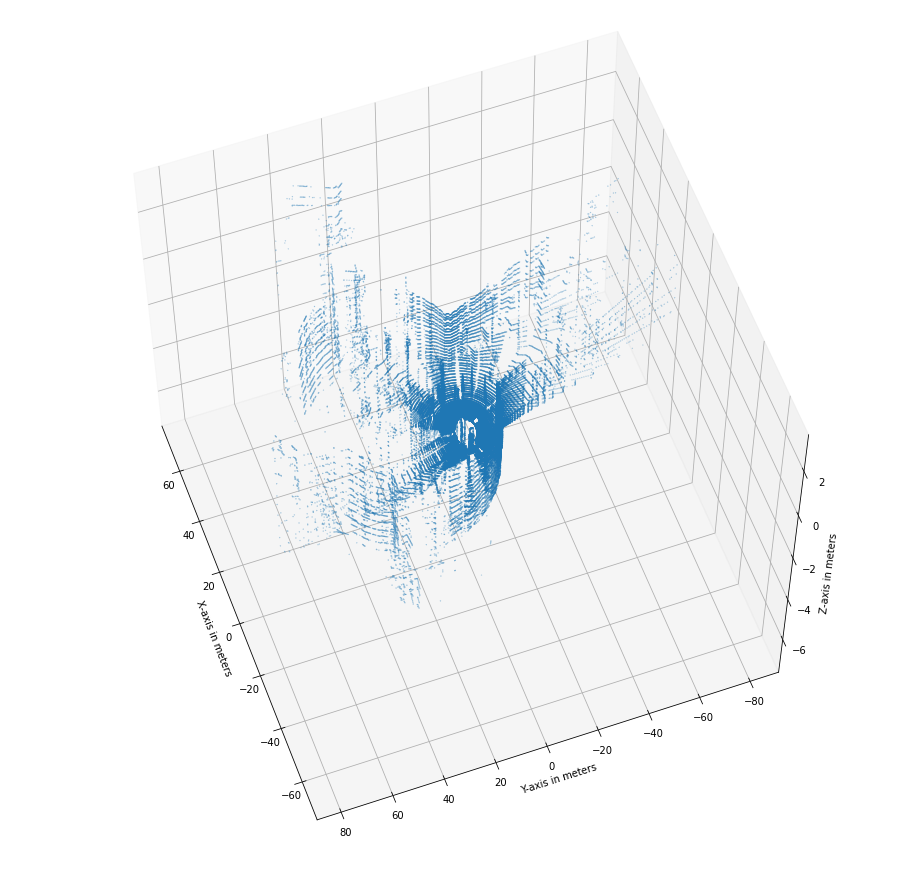

In [ ]:
plt.figure(figsize=[16,16])
ax = plt.axes(projection = '3d')
ax.set_xlabel('X-axis in meters')
ax.set_ylabel('Y-axis in meters')
ax.set_zlabel('Z-axis in meters')
ax.scatter3D(data_mod[:,0],data_mod[:,1],data_mod[:,2],s=0.05)
ax.view_init(60,160)

In [10]:
dist_x = 35
dist_y = 35
j=0
temp = np.ndarray([data_mod.shape[0],3],dtype = np.float32) # pre-allocation to avoid CPU overhead
length = data_mod.shape[0]
for i in range(length):
  if (data_mod[i,0]>=-dist_x) & (data_mod[i,0]<=dist_x):
    if (data_mod[i,1]>=-dist_y) & (data_mod[i,1]<=dist_y):
      temp[j,:] = data_mod[i,0:3]
      j+=1

In [ ]:
temp.shape

(123397, 3)

In [ ]:
j

116025

In [11]:
lidar = temp[:j,:]

In [12]:
np.min(lidar)

-34.986

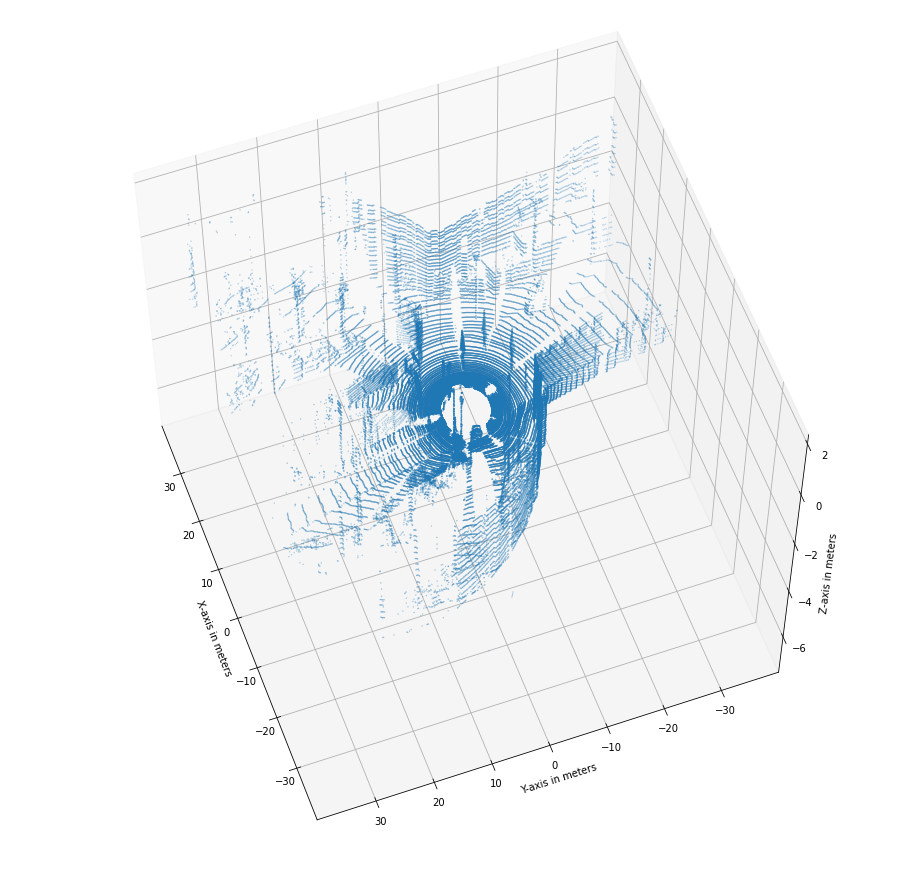

In [ ]:
plt.figure(figsize=[16,16])
ax = plt.axes(projection = '3d')
ax.set_xlabel('X-axis in meters')
ax.set_ylabel('Y-axis in meters')
ax.set_zlabel('Z-axis in meters')
ax.scatter3D(lidar[:,0],lidar[:,1],lidar[:,2],s=0.05)
ax.view_init(60,160)

#DEEP LEARNING INFERENCE

In [13]:
import torch
import torchvision
from PIL import Image
import cv2 #opencv

In [15]:
# CLASSIFICATION, DETECTION, SEGMENTATION, ACTIVITY UNDERSTANDING
model = torch.hub.load('ultralytics/yolov5','yolov5s', pretrained = True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-13 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [22]:
img = cv2.imread('test_repo/image_02/data/0000000000.png')# BGR format

In [24]:
img.shape

(375, 1242, 3)

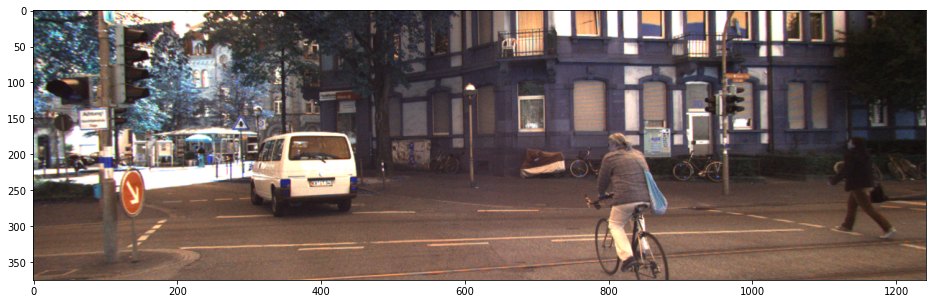

In [27]:
%matplotlib inline
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=[16,5])
plt.imshow(img)


In [28]:
results = model(img)

In [29]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,299.533051,166.478348,452.993988,287.557190,0.893104,2,car
1,1113.891602,171.598785,1200.758423,314.766693,0.888184,0,person
2,773.785767,166.616074,880.526733,357.294342,0.865534,0,person
3,774.501465,263.949585,883.912476,372.816071,0.833203,1,bicycle
4,889.029907,201.076584,958.452271,237.101639,0.653764,1,bicycle
5,963.778381,93.183098,997.901978,155.243149,0.563171,9,traffic light
6,743.101929,195.471359,787.478210,233.525558,0.527899,1,bicycle
7,128.128815,30.882849,167.239685,128.790451,0.359217,9,traffic light
8,933.738647,118.520226,954.198975,145.610916,0.308256,9,traffic light
9,679.060486,192.493607,776.339172,232.091171,0.253706,1,bicycle


In [50]:
imgs = torch.tensor(img)
imgs = imgs.permute(2,0,1) #channel, r, c
visualize_img = torchvision.utils.draw_bounding_boxes(imgs, results.xyxy[0][:,0:4], list(results.pandas().xyxy[0]['name']))
visualize_img.shape
vis = visualize_img.permute(1,2,0)
vis.shape
vis = vis.numpy()

In [33]:
type(vis)

numpy.ndarray

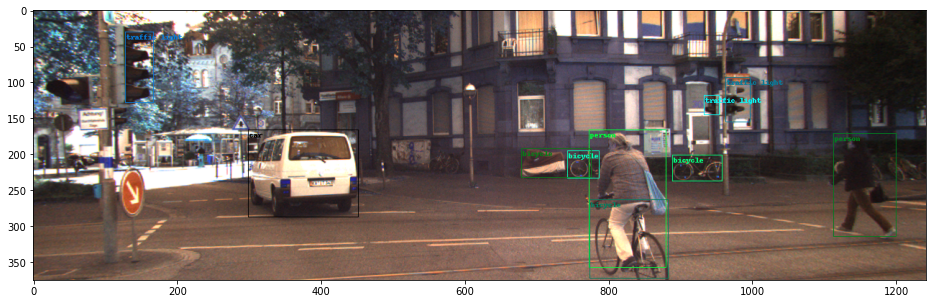

In [51]:
type(vis)
vis.shape
plt.figure(figsize=[16,5])
plt.imshow(vis)

In [36]:
interested_objects = results.xyxy[0].numpy()
print(interested_objects,type(interested_objects))

[[     299.53      166.48      452.99      287.56      0.8931           2]
 [     1113.9       171.6      1200.8      314.77     0.88818           0]
 [     773.79      166.62      880.53      357.29     0.86553           0]
 [      774.5      263.95      883.91      372.82      0.8332           1]
 [     889.03      201.08      958.45       237.1     0.65376           1]
 [     963.78      93.183       997.9      155.24     0.56317           9]
 [      743.1      195.47      787.48      233.53      0.5279           1]
 [     128.13      30.883      167.24      128.79     0.35922           9]
 [     933.74      118.52       954.2      145.61     0.30826           9]
 [     679.06      192.49      776.34      232.09     0.25371           1]] <class 'numpy.ndarray'>


In [39]:
coord = np.where(interested_objects[:,5]==0)
interested_objects = interested_objects[coord]

In [80]:
print(interested_objects)

[[     1113.9       171.6      1200.8      314.77     0.88818           0]
 [     773.79      166.62      880.53      357.29     0.86553           0]]


In [100]:
output = {'detection_boxes':interested_objects[:,:4],
          'detection_classes':np.array([[0],[0]],dtype=np.uint8),
          'detection_names':np.array(['person', 'person'],dtype='<U13'),
          'detection_scores':np.array([[interested_objects[0,4]],[interested_objects[1,4]]]),
          'num_detections':interested_objects.shape[0]
    
}
print(output)

{'detection_boxes': array([[     1113.9,       171.6,      1200.8,      314.77],
       [     773.79,      166.62,      880.53,      357.29]], dtype=float32), 'detection_classes': array([[0],
       [0]], dtype=uint8), 'detection_names': array(['person', 'person'], dtype='<U13'), 'detection_scores': array([[    0.88818],
       [    0.86553]], dtype=float32), 'num_detections': 2}


In [ ]:
S_02: 1.392000e+03 5.120000e+02 original number of cols, rows but we have 1392-1242, 512-375 # Epipolar Rectification
K_02: 9.597910e+02 0.000000e+00 6.960217e+02 0.000000e+00 9.569251e+02 2.241806e+02 0.000000e+00 0.000000e+00 1.000000e+00
D_02: -3.691481e-01 1.968681e-01 1.353473e-03 5.677587e-04 -6.770705e-02
R_02: 9.999758e-01 -5.267463e-03 -4.552439e-03 5.251945e-03 9.999804e-01 -3.413835e-03 4.570332e-03 3.389843e-03 9.999838e-01
T_02: 5.956621e-02 2.900141e-04 2.577209e-03
S_rect_02: 1.242000e+03 3.750000e+02
R_rect_02: 9.998817e-01 1.511453e-02 -2.841595e-03 -1.511724e-02 9.998853e-01 -9.338510e-04 2.827154e-03 9.766976e-04 9.999955e-01
P_rect_02: 7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01 0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01 0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03

In [ ]:
7.215377e+02 0.000000e+00 6.095593e+02 4.485728e+01 
0.000000e+00 7.215377e+02 1.728540e+02 2.163791e-01 
0.000000e+00 0.000000e+00 1.000000e+00 2.745884e-03

In [ ]:
R_00: 
1.000000e+00 0.000000e+00 0.000000e+00 
0.000000e+00 1.000000e+00 0.000000e+00 
0.000000e+00 0.000000e+00 1.000000e+00


T_00: 
2.573699e-16 
-1.059758e-16 
1.614870e-16

In [ ]:
from numpy.matrixlib.defmatrix import matrix
Velo to Cam
R: 7.533745e-03 -9.999714e-01 -6.166020e-04 1.480249e-02 7.280733e-04 -9.998902e-01 9.998621e-01 7.523790e-03 1.480755e-02
T: -4.069766e-03 -7.631618e-02 -2.717806e-01

Homogeneous Transformation matrix

7.533745e-03 -9.999714e-01 -6.166020e-04 -4.069766e-03 
1.480249e-02 7.280733e-04 -9.998902e-01  -7.631618e-02
9.998621e-01 7.523790e-03 1.480755e-02 -2.717806e-01
0            0            0             1

In [53]:
512/2


256.0

In [54]:
Projection_matrix = np.array([[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],[0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01 ],[0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]])
Rotation_matrix = np.array([[9.998817e-01, 1.511453e-02, -2.841595e-03, 0],[-1.511724e-02, 9.998853e-01, -9.338510e-04, 0],[2.827154e-03, 9.766976e-04, 9.999955e-01,0],[0,0,0,1]])
Transform_velodyne_to_camera = np.array([[7.533745e-03, -9.999714e-01, -6.166020e-04,-4.069766e-03 ],[1.480249e-02, 7.280733e-04, -9.998902e-01,-7.631618e-02],[9.998621e-01, 7.523790e-03, 1.480755e-02,-2.717806e-01],[0,0,0,1]])

In [55]:
print(Projection_matrix)
print(Rotation_matrix)
print(Transform_velodyne_to_camera)

[[     721.54           0      609.56      44.857]
 [          0      721.54      172.85     0.21638]
 [          0           0           1   0.0027459]]
[[    0.99988    0.015115  -0.0028416           0]
 [  -0.015117     0.99989 -0.00093385           0]
 [  0.0028272   0.0009767           1           0]
 [          0           0           0           1]]
[[  0.0075337    -0.99997  -0.0006166  -0.0040698]
 [   0.014802  0.00072807    -0.99989   -0.076316]
 [    0.99986   0.0075238    0.014808    -0.27178]
 [          0           0           0           1]]


In [101]:
i_length = output['num_detections']
temp_boxes = np.ndarray([i_length, 4],dtype = np.float32)
temp_classes = np.ndarray([i_length, 1],dtype = np.uint8)
temp_scores = np.ndarray([i_length, 1],dtype = np.float32)
temp_names = []
temp_points = {}
temp_pixels = {}
num_points = 0
key_str = 0

In [102]:
for i in range(i_length): #no indent
  temp_names.append(output['detection_names'][i])

In [103]:
temp_names

['person', 'person']

In [73]:
lidar

array([[     22.719,       0.031,       0.977],
       [     18.052,       0.076,        0.82],
       [     18.026,       0.132,       0.819],
       ...,
       [      3.777,      -1.409,      -1.764],
       [      3.775,      -1.394,       -1.76],
       [      5.634,      -1.395,       -2.59]], dtype=float32)

In [104]:
for i in range(i_length):
  key = "object_"+str(key_str)#one indent
  temp_points[key] = np.ndarray([lidar.shape[0],3], dtype = np.float32)
  temp_pixels[key] = np.ndarray([lidar.shape[0],2], dtype = np.float32)
  xmin = output['detection_boxes'][i,0]
  xmax = output['detection_boxes'][i,2]
  ymin = output['detection_boxes'][i,1]
  ymax = output['detection_boxes'][i,3]
  j_length = lidar.shape[0]
  k = 0
  for j in range(j_length):
    world_pt = np.array([lidar[j,0],lidar[j,1],lidar[j,2],1]).reshape(4,1)
    temp_x, temp_y, temp_z = np.matmul(np.matmul(np.matmul(Projection_matrix, Rotation_matrix),Transform_velodyne_to_camera), world_pt)
    x, y = temp_x/temp_z, temp_y/temp_z

    if x > xmin and x < xmax:
      if y > ymin and y < ymax:#three indent
        temp_points[key][k] = lidar[j,0],lidar[j,1],lidar[j,2]

        if lidar[j,0]<0:#four indent
          continue
        temp_pixels[key][k] = x, y
        k+=1
        num_points+=1
  temp_boxes[key_str] = output['detection_boxes'][i]#one indent
  temp_classes[key_str] = output['detection_classes'][i]
  temp_scores[key_str] = output['detection_scores'][i]
  temp_names[key_str] = output['detection_names'][i]
  temp_points[key] = temp_points[key][:k,:]
  temp_pixels[key] = temp_pixels[key][:k,:]
  key_str+=1
output['num_detections'] = key_str#no indent
output['detection_boxes'] = temp_boxes[:key_str]
output['detection_classes'] = temp_classes[:key_str]
output['detection_scores'] = temp_scores[:key_str]
output['detection_names'] = temp_names[:key_str]
output['detection_lidar_points'] = temp_points
output['detection_lidar_rgb_pixels'] = temp_pixels  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [105]:
output

{'detection_boxes': array([[     1113.9,       171.6,      1200.8,      314.77],
        [     773.79,      166.62,      880.53,      357.29]], dtype=float32),
 'detection_classes': array([[0],
        [0]], dtype=uint8),
 'detection_names': ['person', 'person'],
 'detection_scores': array([[    0.88818],
        [    0.86553]], dtype=float32),
 'num_detections': 2,
 'detection_lidar_points': {'object_0': array([[     23.503,     -18.743,      -0.031],
         [     23.522,     -18.638,      -0.031],
         [     23.491,     -18.494,       -0.03],
         ...,
         [        8.9,      -5.959,      -1.681],
         [      8.907,      -5.923,      -1.679],
         [      8.927,      -5.896,      -1.679]], dtype=float32),
  'object_1': array([[     21.527,      -7.795,       0.279],
         [     21.539,      -7.723,       0.279],
         [     21.502,      -7.633,       0.279],
         ...,
         [       7.25,      -1.501,       -1.73],
         [      7.255,       -1.49, 

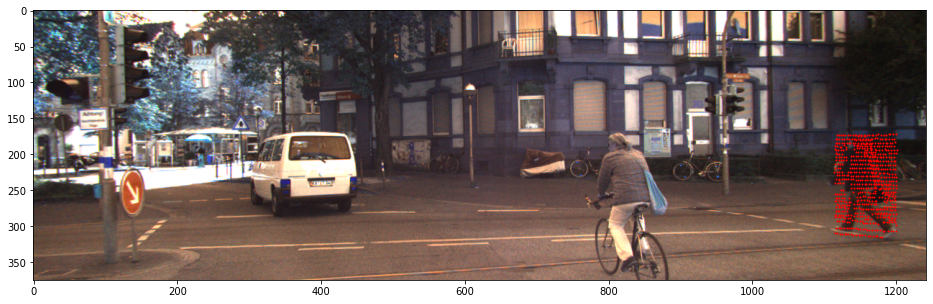

In [106]:
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.scatter(output['detection_lidar_rgb_pixels']['object_0'][:,0],output['detection_lidar_rgb_pixels']['object_0'][:,1], c='r', s=1)

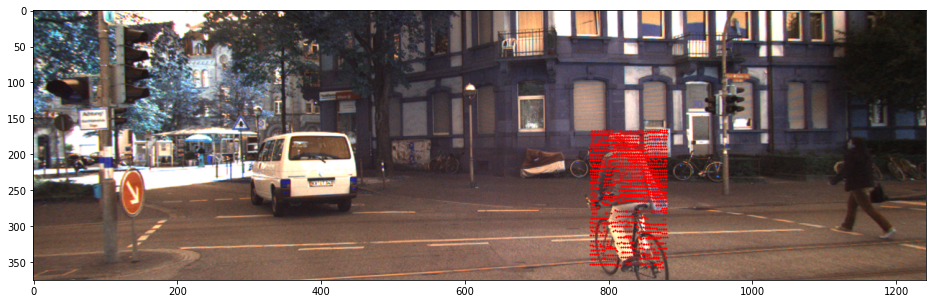

In [107]:
plt.figure(figsize=(16,9))
plt.imshow(img)
plt.scatter(output['detection_lidar_rgb_pixels']['object_1'][:,0],output['detection_lidar_rgb_pixels']['object_1'][:,1], c='r', s=1)

In [90]:
output['detection_lidar_points']['object_0'].shape

(1691, 3)

In [94]:
np.max(output['detection_lidar_points']['object_0'][:,0])

21.539

In [95]:
np.min(output['detection_lidar_points']['object_0'][:,0])

5.372

In [93]:
output['detection_lidar_points']['object_0']

array([[     21.527,      -7.795,       0.279],
       [     21.539,      -7.723,       0.279],
       [     21.502,      -7.633,       0.279],
       ...,
       [       7.25,      -1.501,       -1.73],
       [      7.255,       -1.49,      -1.731],
       [      7.282,      -1.472,      -1.737]], dtype=float32)